# Myopia Clusters

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import warnings
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

### Prepare the Data

In [2]:
# load data
warnings.filterwarnings('ignore')
myopiaDF = pd.read_csv('..\Resources\myopia.csv')
print(f"columns: {myopiaDF.shape[1]} rows: {myopiaDF.shape[0]}")
myopiaDF.head(2)

columns: 15 rows: 618


,AGE,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY,MYOPIC
0,6,-0.052,21.889999,3.690,3.498,14.70,45,8,0,0,10,34,1,1,1
1,6,0.608,22.379999,3.702,3.392,15.29,4,0,1,1,7,12,1,1,0


In [3]:
# manage outcome column
y = myopiaDF["MYOPIC"]
myopiaDF = myopiaDF.drop(columns="MYOPIC")
myopiaDF.head(2)

,AGE,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY
0,6,-0.052,21.889999,3.690,3.498,14.70,45,8,0,0,10,34,1,1
1,6,0.608,22.379999,3.702,3.392,15.29,4,0,1,1,7,12,1,1


In [4]:
# split data
X = myopiaDF

# scale data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

### Apply Dimensionality Reduction

In [5]:
# use pca
pca = PCA(n_components = 0.90)
X_pca = pca.fit_transform(X_scaled)
X_pcaDF = pd.DataFrame(data = X_pca)

print(f"columns: {X_pcaDF.shape[1]} rows: {X_pcaDF.shape[0]}")

columns: 10 rows: 618


columns: 2 rows: 618


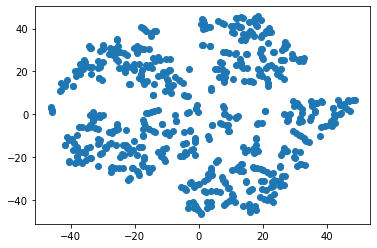

In [6]:
tsne = TSNE(learning_rate=7, perplexity=7)
tsne_features = tsne.fit_transform(X_pcaDF)
tsneDF = pd.DataFrame(data = tsne_features)

print(f"columns: {tsneDF.shape[1]} rows: {tsneDF.shape[0]}")

# Scatter plot
plt.scatter(tsneDF[0], tsneDF[1])
plt.show()

           There appear to be 4-5 clusters.

### Perform a Cluster Analysis with K-means

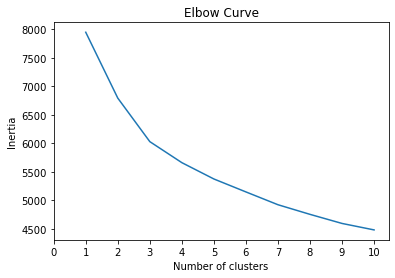

In [7]:
inertia = []
k = list(range(1, 11))

# Calculate the inertia for the range of k values
for i in k:
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(X_pcaDF)
    inertia.append(km.inertia_)

# Creating the Elbow Curve
elbow_data = {"k": k, "inertia": inertia}
elbowDF = pd.DataFrame(elbow_data)

plt.plot(elbowDF['k'], elbowDF['inertia'])
plt.xticks(list(range(11)))
plt.title('Elbow Curve')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

    k = 4 appears to be the best estimate of clusters